# Variational Inference

## Variationa Inference 요약

  - VAE의 핵심은 Variational Inference(VI)이다. DNN은 Variational Inference를 하기 위한 기존 통계적인 방법들에 비해 아주 큰 해상도를 지니는 하나의 방법일 뿐이다.
    * 자주 GAN(Generative Adversarial Network)와 비교되는데 이는 둘 다 비지도 학습(unsupervised learning)이면서, 주어진 정보를 이용해서 무언가 새롭게 만들어낼 수 있는 능력 때문이다.
    * GAN이 two-player 개념에 근거하여 새로운 Loss function을 제시하였다면, VAE는 새로운 Loss Function을 제공했다기 보다는 VAE의 목적함수를 Autoencoder 개념 하에서 재해석하였다고 간주할 수 있다.
    

  - VI를 위해 DNN의 큰 capacity를 이용, hidden variable을 정의하였다는 것이 특징이다.
    * Variational Inference의 전신(?)이라고 생각할 수 있는 EM algorithm에 비해 variational inference도 확률모형에 기반하지 않고 분포를 근사하는 용도로만 사용하고 있지만, VAE는 이런 사상을 극대화한 방법이다.
    * VAE의 instrumental distribution는 전혀 확률모형에 기반하지 않고 sample이 편한 확률분포이기만 하면 된다.

  - DNN을 이용함으로써, SGD 최적화 algorithm 사용하여 쉽게 학습 가능하다.
    * VI로 분포를 추정하는 경우, 기존에는 MCMC 등 computing이 많이 필요로 하는 기법을 사용하였지만, VAE의 경우 backpropagation에 근거한 방법들을 쉽게 적용할 수 있다는 장점이 있다.
    
  - 이렇게 해서 얻은 latent mapping은 Latent variable의 공간에서의 거리가 의미를 지닌다는 장점이 있다.
    * 이는 GAN과 마찬가지 성격으로, embedding과도 그 개념이 연결되어 있다.

## 확률 모형

- 결국 통계 분석의 궁극적인 목적은 다음의 우도함수에 대해 속속들이 알아내는 것이다.
$$ P(X;\theta) = L(\theta; X)$$
  * 이것만 알고 있으면, 주어진 data로 알아낼 수 있는 모든 현상은 계산해 낼 수 있다.
  * $\theta$를 알고 있기만 하다면, 확률변수 $X$가 어떤 확률로 어떤 범위에 있을지를 계산할 수도 있다. 이것만 계산할 수 있으면 확률의 세계에서는 모든 것을 알고 있다라고 말한다.
  * Frequentist, Fisherian들이 많이 연구하는 모수통계(Parametric statisics)에서는 그러한 확률분포가 몇몇 개의 모수로 표현되는 경우를 상정하고 그 가정 하에서 분포를 찾아내는 작업을, 
  * 비모수통계(Nonparametric statics)에서는 최소한의 가정만으로 이를 찾아내고자 한다.
  * 또 하나의 극단은, 이런 확률 분포를 sample로 가지고 있는 경우로, Bayesian들이 주로 택하는 방법이다.
  * 모수적인 방법은 이론적으로 아름답지만, 다룰 수 있는 문제의 범위가 작고, 그다음으로 비모수 통계는 문제의 범위가 작으며, Sampling 방법에 의존한 방법들은 computing power만 허락한다면, 거의 모든 문제를 다룰 수 있다.

## 확률 모형의 근사

- 하지만, 많은 경우, 우도함수가 아주 복잡한 함수일 경우가 많아, 이를 바로 추정하는 것은 계산상 거의 불가능한 일인 경우가 많이 있다.
  * Sampling 방법을 사용할 수 있기는 하지만, sampling 방법은 시간이 많이 든다는 커다란 단점이 있다.
  * 이를 해결하기 위해서 Bayesian에서도 근사법(approximation method)를 사용한다.
  
- 근사하는 방법에는 Laplace approximation 등의 방법이 존재하기는 하지만, 나중에 Bayesian에서 사용하는 VI의 모태가 되는 idea로 EM algorithm(Dempster et al. 1977)이 있다. 
  * 만약에 실제 관측되는 변수의 생성원리(probabilitistic mechanism)를 잘 설명할 수 있는 잠재변수(Latent variable)을 알 수 있다면, 위의 Likelihood는 다음과 같이 쓸 수 있다.
$$L(\theta; x)= p(x|\theta)=\sum_z p(x,z|\theta)=\int_\Omega p(x,z|\theta)dz$$
  * 이런 모형이 상정된 이상, 1.2에 정의한 $L(\theta; X)$를 marginal likelihood라고 부른다.
  * $p(x, z)$를 안다는 것은 $p(x|z)$를 알고, $p(z)$를 안다는 것과 동치이다.
  * $P(x|z)$는 확률 모형으로 설정하여 추정을 하고, $p(z)$는 보통 가정을 하게 된다.

# EM algorithm

- EM algorithm을 적용할 수 있는 문제가 그렇게 많지는 않다.
  * EM algorithm을 만들 수 있으려면, 다음의 두가지가 만족이 되어야 한다.
    * 관측되는 현상을 만들어내는 원리를 묘사할 수 있는 잠재변수(Latent variable)과 이를 연결시켜줄 수 있는 확률모형이 존재해야 한다.
    * 그러한 상황에서 Latent variable을 추정할 수 있어야 하고, 무엇보다도 문제를 간소화 할 수 있어야 한다.
  * 하지만, 위의 조건을 만족하는 모형은 그렇게 많지 않다.
    * 가장 많이 알려진 모형은 mixture model이다.
    * mixture model은 k-means clustering의 일반화된 형태라고 생각할 수 있다. 결국 mixture 모형을 극도로 단순하게 만들어 놓은 것이 k-means이고, k-means algorithm은 EM algorithm의 가장 간단한 형태라고 생각할 수 있다. 뒷부분에서 이야기 될 것이다.
    * 사례는 적극적으로 찾아보지는 못했지만, 그 이외에 적용하는 사례는 EM algorithm가 일반화된 형태인 MM algorithm을 연구하는 school 밖에서는 크게 찾아보기 어렵다. 앞으로 찾게 되면 소개하도록 하겠다.
    * Mixture model은 관측되는 확률 변수가 간단한 여러 확률 변수가 섞여 있는 형태로 가정한다. 이 예를 통하면 EM-algorithm이 무엇인지 구체적으로 이해할 수 있을 것이라 생각한다.

# Finite Gaussian Mixture Model

- 확률 변수 X에 대해 다음과 같이 정의된다.
$$p(x|\theta)=\sum_{k=1}^K \pi_k N(x|\mu_k,\Sigma_k), \quad \sum_{k=1}^K \pi_k=1$$
  * $\theta$는 여기서 $(\mu_k, \Sigma_k)$가 되고, 이는 $k$개 확률분포의 평균과 분산을 의미한다.
  * 이렇게 표현함으로써 다음과 같은 복잡한 분포를 7개의 간단한 분포의 합으로 표현할 수 있다.
![](imagename.png "Title")[../data/img1.png]
  * 가장 쉬운 형태의 mixture model이다.
  * 위와 같이 새로운 확률변수 $p(x_i|\theta)$를 만들어도 이는 확률변수의 공리(axiom)을 만족한다.
    * 당연히 모든 event에 대한 확률값은 0보다 크다.
    * 그리고 모든 event에 대해 확률값을 더했을 때 1이 된다.
$$\int f(x|\theta) dx =\int \sum_{k=1}^K \pi_k f_k(x|\mu_k,\Sigma_k) dx = \sum_{k=1}^K\int f_k(x|\mu_k,\Sigma_k) dx=1$$

- 다음과 같이 쓸 수 있다.
$$ \begin{eqnarray}
Z_{ij}  &=\left\{ \begin{array}{cl} 1 & x_i \in j \\ 0 & o.w. \end{array}\right. \\
L(\theta; x_{i=1}^N) &= p(x_1,\ldots, x_n |\theta) = \prod_{i=1}^N \prod_{j =1 }^K p(x_i|j,\theta)^{z_{ij}}
\end{eqnarray}$$

# Lowerbound for EM algorithm

- EM algorithm은 잠재변수의 도입으로 쉽게 계산할 수 있는 lower-bound를 계산하고, 이 lower-bound를 최대화하는 모수를 찾는 과정을 반복하는 것이다.
  * log-likelihood를 최대화한다는 것은 likelihood를 최대화한다는 것과 동치이다.
  * Lower bound를 찾는 과정을 Expectation 단계, 그렇게 찾은 Lower bound를 최대화하는 과정을 Maximization 단계라고 한다.
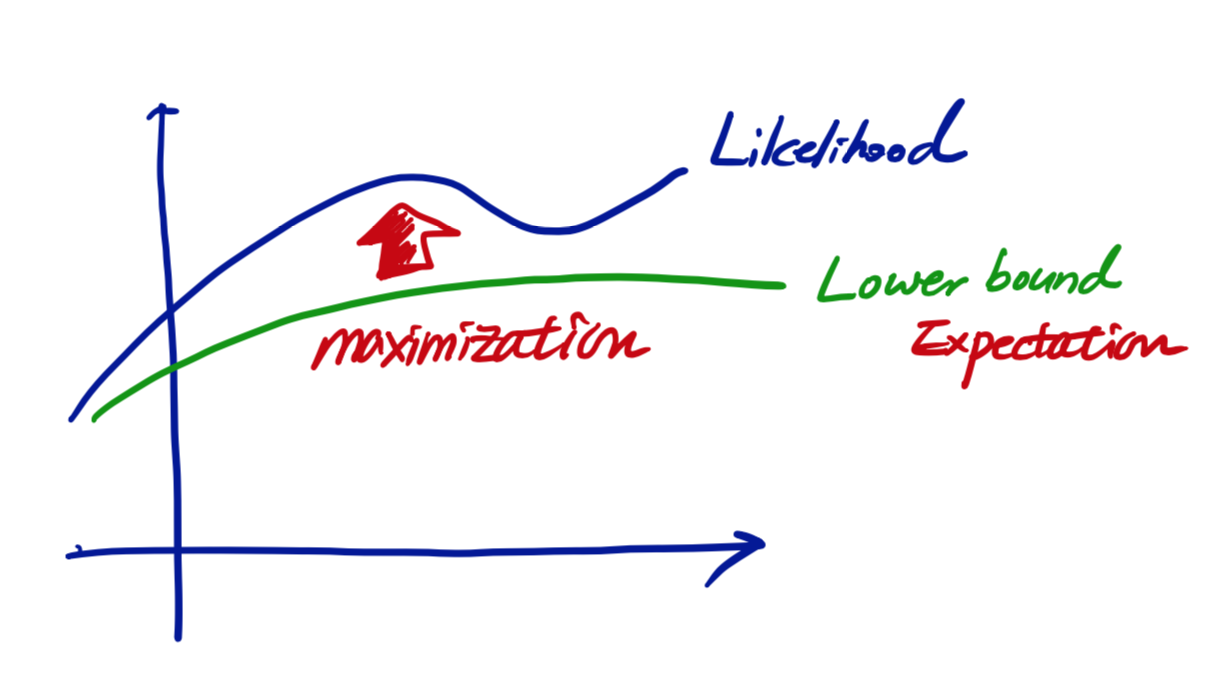
  * Lower bound는 여러가지 종류가 있다.

* Likelihood보다 항상 작은 lower bound는 다음과 같이 찾을 수 있다. 어떤 확률분포 $Q(\cdot)$을 따르는 확률변수 $z$가 있다고 하면, 다음의 식을 구할 수 있다.
$$\begin{eqnarray}
l(\theta) &= \sum_{i = 1 } ^m \log \sum_{z} Q(z) \left[\frac{p( x^{(i)}, z ;\theta)}{Q(z)}\right] \\
&= \sum_{i=1}^m \log E_{z\sim Q}\left[\frac{p( x^{(i)}, z ;\theta)}{Q(z)}\right]\\
&\ge \sum_{i=1}^m E_{z\sim Q}\left[\log\frac{p( x^{(i)}, z ;\theta)}{Q(z)}\right]
\end{eqnarray}$$
* $x^{(i)}$는 $i$-번째 관측치를 의미한다.
* 마지막 부등식은 Jensen inequality에 의해 성립한다.
* 가장 효율적인 Lower bound를 생각해 보면, 결국 $l(\theta) = \sum_{i=1}^m E_{z\sim Q}\left[\log\frac{p( x^{(i)}, z ;\theta)}{Q(z)}\right]$를 만족하는 $Q(\cdot)$가 최적의 근사함수가 될 것이다. 

* 우리는 반복적으로 likelihood의 lower-bound를 개선시켜 나갈 것이므로, $t$번 반복해서 얻은 $\theta^{(t)}$를 바탕으로 $\theta^{(t+1)}$을 찾는 상황으로 좁혀 보면, $Q^{(t+1)}$를 효율적으로 잘 찾아야 $\theta^{(t+1)}$을 잘 찾을 수 있다.
* $t$-번째 반복이 이루어진 상황에서, 위의 Jensen's inequality에서 등호가 성립하려면, $\log\frac{p( x^{(i)}, z ;\theta^{(t)})}{Q^{(t+1)}(z)}$가 상수여야 한다.
* 이는 곧 $\frac{p( x^{(i)}, z ;\theta^{(t)})}{Q^{(t+1)}(z)}$가 상수여야 함을 의미한다.
* 결국 $Q^{(t+1)}(z)$이 $p( x^{(i)}, z ;\theta^{(t)})$에 비례해야 한다는 것을 의미하고,
* $Q^{(t)}(z)$가 $z$에 관한 함수이므로, 다음의 관계를 도출할 수 있다.
$$Q^{(t+1)}(z) = \frac{p( x^{(i)}, z ;\theta^{(t)})}{\sum_z p( x^{(i)}, z ;\theta^{(t)})} = p( z | x^{(i)}, \theta^{(t)})$$
  * NOTE: $\sum_z p( x^{(i)}, z ;\theta^{(t)})$는 $z$에 관해 상수이다.
  
* 따라서, $t$-번째 반복에서 얻어진 모수, $\theta^{(t)}$,가 주어진 상태에서의 $z$의 posterior 분포가 가장 효율적인 $Q^{(t+1)}$의 역할을 할 수 있음을 의미한다.
* $\theta^{(t+1)}$은 다음처럼 update한다.
$$\theta^{(t+1)} = \arg\max_{\theta} \sum_{i = 1}^ m E_{z\sim Q^{(t+1)}}\left[\frac{p( x^{(i)}, z ;\theta^{(t)})}{Q^{(t+1)}(z)}\right]$$

* **MONOTONICITY**:
  * 한가지 더 확인해야 할 것은 $(t+1)$번째 반복에서 얻어진 log-likelihood의 값이 $(t)$-번째 얻어진 log-likelihood의 값보다 항상 커지는가하는 것이고, 수식으로 나타내면, $l(\theta^{(t+1)}) \ge l(\theta^{(t)})$임을 보이는 것으로 다음의 식에서 알 수 있다.